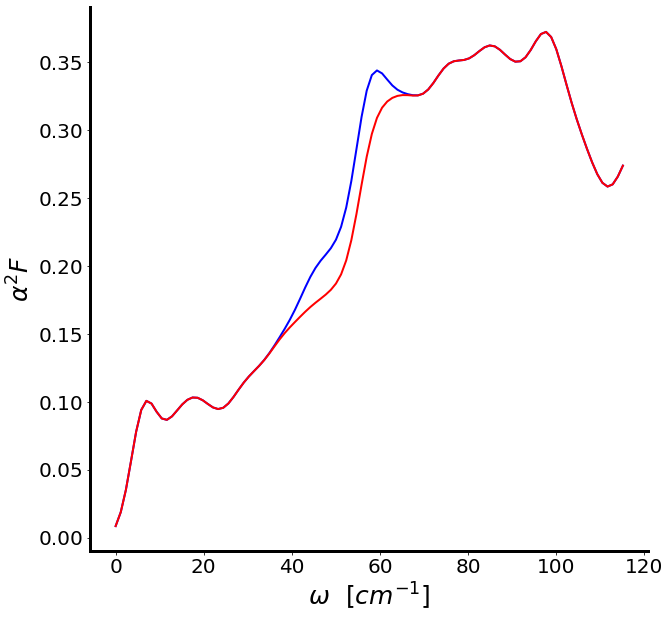

In [16]:
import numpy
import matplotlib.pyplot as plt

ismear = 10
delta_qsmear = 0.05 #meV
degaussq = 0.05 #meV
degaussw = 0.025 #eV
nqstep = 1000
nqtotf = 50000
eps_acustic = 60 #cm-1

dq = 0.25

#file containing qf, wqf and iq/mode resolved frequencies
a2fdata_file = "P4nmm_e036_fc/a2f.data"

#file containing iq/mode resolved frequencies (meV) and linewidths (meV)
lw_file = "P4nmm_e036_fc/linewidth.phself_grid"

#file containing iq/mode resolved lambdas (meV)
lambda_file = "P4nmm_e036_fc/lambda.phself"

#a2f file for comparison (calculated for nqstep = 10000)
a2f_file = "P4nmm_e036_fc/P4nmm_e036_fc.a2f.01"

#____________________________________________________________________#
mev_to_cm1 = 8.06554
cm1_to_mev = 1/mev_to_cm1
mev_to_ry = 0.000073499
ry_to_mev = 1/mev_to_ry

delta_qsmear *= mev_to_cm1
degaussq *= mev_to_cm1
degaussw *= 1000 * mev_to_cm1

#get wf and calculate dw
wf_lw = numpy.loadtxt(lw_file, skiprows=2)
wf = wf_lw[:,2] * mev_to_cm1
nmodes = int(wf.size/nqtotf)
om_max = 1.1 * wf.max()
dw = om_max / nqstep

#get qf and wqf 
a2fdata = numpy.loadtxt("P4nmm_e036_fc/a2f.data")
qf = a2fdata[:,0:3]
wqf = a2fdata[:,3]

#get lambdas
lambda_all = numpy.loadtxt(lambda_file, skiprows=8)[:,1:1+nmodes] * mev_to_cm1

#load a2f
a2f = numpy.loadtxt(a2f_file)

def w0gauss(x):
    sqrtpm1 = 1.0/1.7724538509055160
    arg = min(200,x**2)
    return sqrtpm1 * numpy.exp(-arg)

def in_box(q,dq):
    for qx in q:
        if qx <= 0.5 + dq and qx >= 0.5 - dq:
            continue
        else:
            return False
    return True

n = 100

sigma = degaussq + (ismear-1) * delta_qsmear

#a2F = numpy.zeros(n)
#a2F_2 = numpy.zeros(n)
#for iw in range(0, n):
#    iomega = iw * dw 
#    print(iw, iomega)
#    for iq in range(0, nqtotf):
#        for imode in range(0, nmodes):
#            index = iq*nmodes + imode
#            w0 = wf[index]
#            q = qf[iq]
#            l  = lambda_all[iq, imode]
#            if l < 0:
#                l = 0
#            a2F_tmp    = wqf[iq] * w0 * l / 2
#            weight = w0gauss((iomega - w0)/sigma) / sigma
#            
#            if w0 < eps_acustic and in_box(q, dq):
#                a2F[iw] += a2F_tmp * weight
#            else:
#                a2F[iw] += a2F_tmp * weight
#                a2F_2[iw] += a2F_tmp * weight


plt.figure(1, figsize=[10,10])
ax = plt.gca()
ax.plot(range(0,n)*dw, a2F[0:n], color="blue", linewidth=2)
ax.plot(range(0,n)*dw, a2F_2[0:n], color="red", linewidth=2)
ax.set_xlabel(r"$\omega \ \ [cm^{-1}]$", fontsize=25)
ax.set_ylabel(r"$\alpha^2F$", fontsize=25)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
#ax.tick_params(labelsize=15) 


#plt.plot(range(0,n)*dw, a2f[0:n, ismear]*mev_to_cm1)
plt.savefig('a2F2.eps', bbox_inches='tight') 
plt.show()

 